In [1]:
# Import packages

import io
import matplotlib.pyplot as plt
import keras 
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds

In [5]:
# Load our data and do a train test split. 

(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', split = (tfds.Split.TRAIN,tfds.Split.TEST),with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIXNPOI/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIXNPOI/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIXNPOI/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [6]:
# We create an encorder. Print out first 20 words. 

encoder = info.features['text'].encoder
print(encoder.subwords[:20])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_']


In [8]:
# We will use padding for the words. 

padded_shapes = ([None],())

In [9]:
# Get train and test batch. 

train_batch = train_data.shuffle(1000).padded_batch(10,padded_shapes = padded_shapes)

test_batch = test_data.shuffle(1000).padded_batch(10,padded_shapes = padded_shapes)

Epoch 1/10
2500/2500 [==============================] - 14s 5ms/step - loss: 0.6707 - accuracy: 0.6191 - val_loss: 0.5413 - val_accuracy: 0.7950
Epoch 2/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.4942 - accuracy: 0.8232 - val_loss: 0.4197 - val_accuracy: 0.8700
Epoch 3/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.3753 - accuracy: 0.8741 - val_loss: 0.3870 - val_accuracy: 0.8500
Epoch 4/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.3134 - accuracy: 0.8931 - val_loss: 0.4251 - val_accuracy: 0.8400
Epoch 5/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2755 - accuracy: 0.9055 - val_loss: 0.3378 - val_accuracy: 0.8900
Epoch 6/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2504 - accuracy: 0.9167 - val_loss: 0.4914 - val_accuracy: 0.8400
Epoch 7/10
2500/2500 [==============================] - 12s 5ms/step - loss: 0.2336 - accuracy: 0.9223 - val_loss: 0.3613 - val_ac

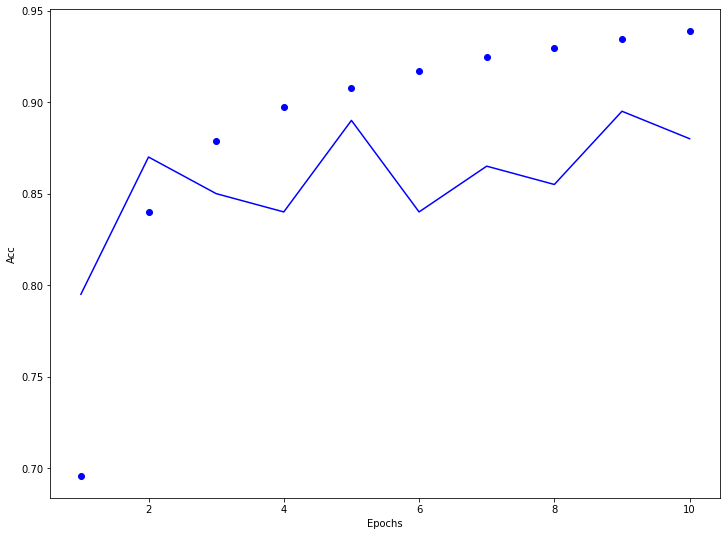

In [13]:
# Create our model. 
embedding_dim = 16
model = keras.Sequential([
                          layers.Embedding(encoder.vocab_size, embedding_dim),
                          layers.GlobalAveragePooling1D(),
                          layers.Dense(1, activation='sigmoid')

])


# compile the model 

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# History of the model. 

history = model.fit(train_batch, epochs=10, validation_data = test_batch, validation_steps = 20)


# Dictionary of results. For plotting later. 

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
epochs = range(1, len(acc) + 1)

# Plot it here. 

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.xlabel("Epochs")
plt.ylabel('Acc')
plt.show()